In [2]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
upload = files.upload()
data_set = pd.read_csv("Mall_Customers.csv")
x = data_set[["Annual Income (k$)","Spending Score (1-100)"]]
standardscaler = StandardScaler()
scaled_x = standardscaler.fit_transform(x)

Saving Mall_Customers.csv to Mall_Customers (1).csv


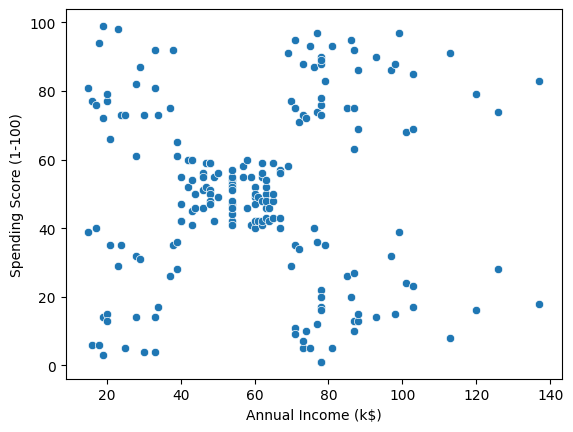

In [8]:
sns.scatterplot(data=data_set, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.show()

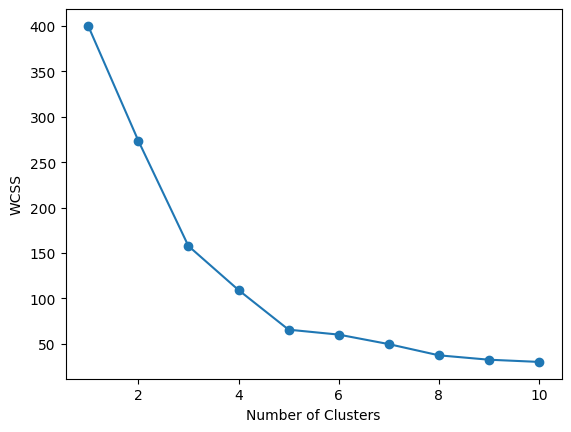

In [11]:
wcss = []
for k in range(1, 11):
  kmeans=KMeans(n_clusters = k, random_state= 42)
  kmeans.fit(scaled_x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss, marker= 'o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
kmeans = KMeans(n_clusters= 5, random_state= 42)
data_set['Cluster'] =kmeans.fit_predict(scaled_x)

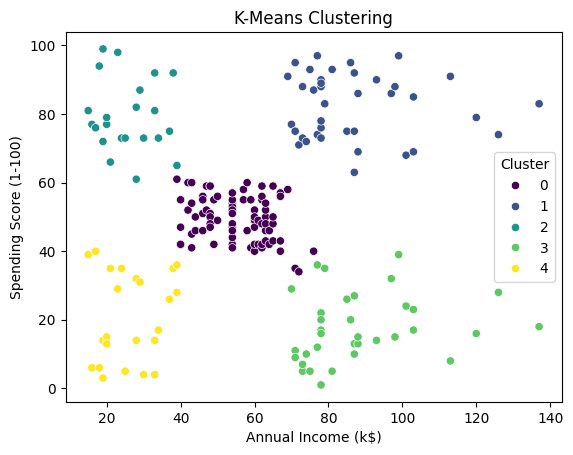

In [13]:
sns.scatterplot(data=data_set, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()

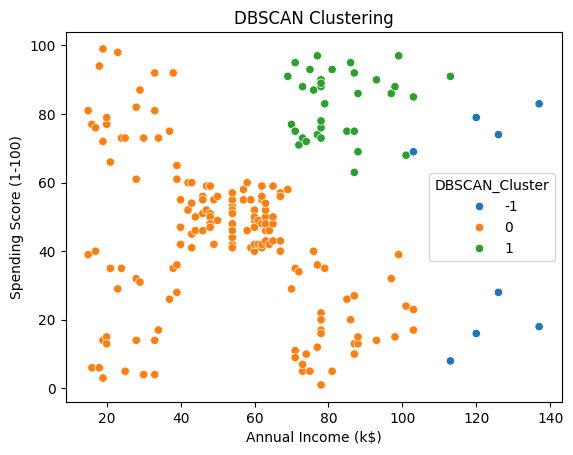

In [19]:
#Bonus Task
dbscan = DBSCAN(eps = 0.5, min_samples= 5)
data_set['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_x)
sns.scatterplot(data=data_set, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='DBSCAN_Cluster', palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()

In [21]:
for cluster in sorted(data_set['Cluster'].unique()):
    avg_spending = data_set[data_set['Cluster'] == cluster]['Spending Score (1-100)'].mean()
    print(f'Cluster {cluster}: Avg Spending Score = {avg_spending:.1f}')

Cluster -1: Avg Spending Score = 46.9
Cluster 0: Avg Spending Score = 43.1
Cluster 1: Avg Spending Score = 82.8
